In [64]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
with open("data/calibration.Spe", "r") as f:
    lines = list(map(lambda x: float(x.strip()), f.readlines()[12:-16]))
bins = np.array(lines)

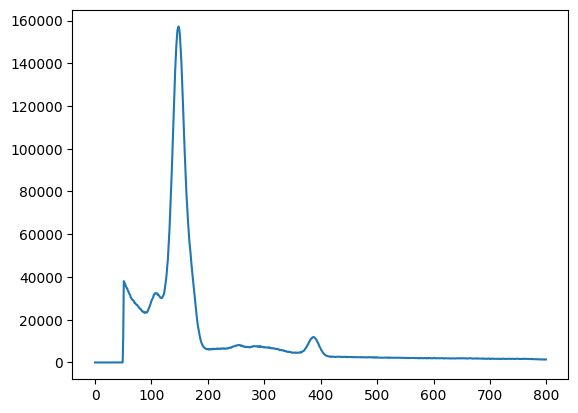

In [66]:
y = bins[:800]
x = np.arange(y.size)
plt.plot(x, y)
plt.show()

In [67]:
bins[100:150]

array([ 28873.,  29368.,  29953.,  30445.,  31564.,  31820.,  32334.,
        32320.,  32444.,  32397.,  32305.,  31698.,  31791.,  31426.,
        31056.,  30608.,  30268.,  30232.,  30076.,  30336.,  30856.,
        31279.,  32020.,  33220.,  35142.,  37175.,  38970.,  41700.,
        45099.,  47800.,  52674.,  57109.,  62454.,  68854.,  75101.,
        81927.,  89280.,  96859., 104419., 112996., 121142., 128979.,
       136167., 142265., 147773., 151730., 155370., 156324., 157206.,
       156432.])

In [68]:
peak = bins[148]

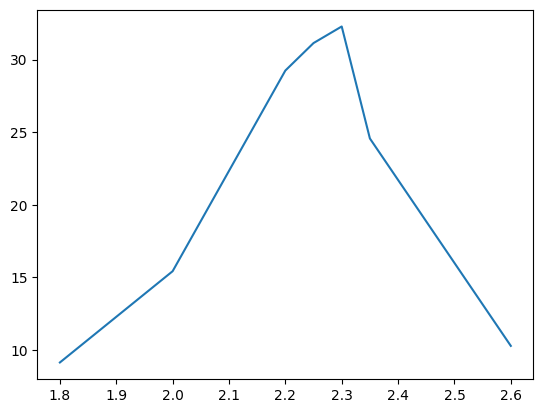

In [81]:
I = np.array([
    2.32,
    3.03,
    3.69,
    4.61,
    5.34
])
B = np.array([
    50.0,
    70.0,
    80.0,
    100.1,
    119.9
])
V = [
    np.array([1.00, 1.12, 1.275, 1.38, 1.46]), # Data maybe not great here, because zoom on MAESTRO wasn't showing all counts
    np.array([1.8, 2.0, 2.2, 2.25, 2.3, 2.35, 2.6]),
    np.array([1.5, 2.50, 2.90, 2.95, 3.05, 3.50]),
    np.array([3.50, 3.70, 3.80, 4.20, 4.46, 4.55, 4.70, 4.90]),
    np.array([3.5, 5.1, 5.3, 5.4, 5.5, 6.2])
]
total_counts = [
    np.array([15.0, 24.0, 35.0, 34.0, 18.0]),
    np.array([32, 54, 117, 109, 113, 86, 36]),
    np.array([18, 65, 67, 88, 44, 26]),
    np.array([80.0, 131.0, 136.0, 120.0, 117.0, 118.0, 126.0,  70.0]),
    np.array([54, 264, 166, 133, 104, 35])
]
minutes = [
    np.array([2.75, 2.5, 3.0, 2.75, 3.0]),
    np.array([3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5]),
    np.array([2.5, 2.5, 1.5, 2.0, 1.5, 2.5]),
    np.array([1.5, 1.5, 1.5, 1.5, 3.5, 3.75, 4.25, 3.5]),
    np.array([2.0, 2.5, 2.5, 2.5, 2.5, 2.0])
]
i = 1
counts_per_minute = total_counts[i] / minutes[i]
# peak_E = np.array([
#     [],
#.     187.69 ish
#     [271.04, 274.16, 274.99, 273.53, 0, 0, 271.87, 274.99]
# ])
plt.plot(V[i], counts_per_minute)
plt.show()

In [70]:
m = 9.11e-31 # kg
c = 3.0e8 # m/s
d = 0.0018 # m
e = 1.6*10**-19 # C
rho = 0.203
def gamma(v):
    return 1.0/np.sqrt(1.0 - np.square(v)/np.square(c))

def ke_vs(B, V):
    E = V / d
    v = E / B
    return m*np.square(c)*(gamma(v) - 1.0)

def G2Tesla(B):
    return B / 10000.0

def J2keV(a):
    return a / 1.6e-16

# print(J2keV(ke_vs(G2Tesla(100.0), 4130.)))

def ke_cyc(B):
    p = B*e*rho
    return m*np.square(c)*(np.sqrt(1.0 + np.square(p/(m*c))) - 1.0)

print(J2keV(ke_cyc(G2Tesla(70.))))

154.13873825504766


In [74]:
# Expected maximum voltage (tells expected velocity of the electron)

def relativistic_expected_voltage(B):
    B_p = B / 10000.
    V = B_p*d/np.sqrt(1/c**2+(m/(e*B_p*rho))**2)
    return V / 1000.

def classical_expected_voltage(B):
    B_p = B / 10000.
    V = B_p*d
    return V / 1000.

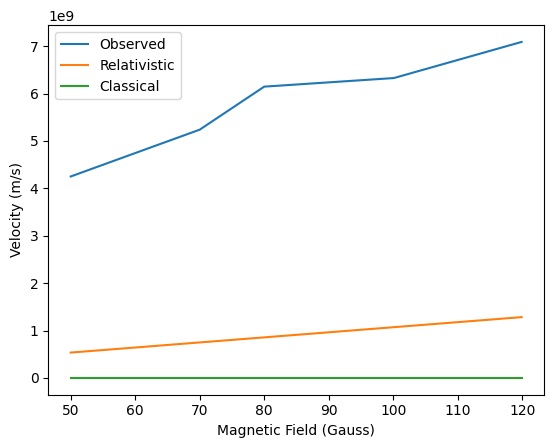

In [79]:
observed_V_0 = np.array([V[i][total_counts[i].argmax()] for i in range(len(B))])

def beta(B, V):
    return V / d / B

def velocity(B, V):
    return beta(B, V) * c

x = B
y_obs = velocity(B, observed_V_0)
y_rel = velocity(B, relativistic_expected_voltage(B))
y_class = velocity(B, classical_expected_voltage(B))
plt.plot(x, y_obs)
plt.plot(x, y_rel)
plt.plot(x, y_class)
plt.legend(["Observed", "Relativistic", "Classical"])

plt.xlabel("Magnetic Field (Gauss)")
plt.ylabel("Velocity (m/s)")
plt.show()

In [73]:
m = 9.11e-28 # kg # eV, g
c = 3.0e10 # m/s
d = 0.18 # m
e = 1.6e-19
def gamma(v):
    return 1.0/np.sqrt(1.0 - np.square(v)/np.square(c))

def ke(B, V):
    E = V / d
    v = E*c / B 
    return m*np.square(c)*(gamma(v) - 1.0)

def G2Tesla(B):
    return B / 10000.0

def J2keV(a):
    return a / 1.6e-16

J2keV(ke(80, 3500. / 300)) / 1e7

361.7696372309184